In [76]:
import matplotlib.pyplot as plt # for data visualization rposes
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [78]:
X, y = datasets.load_iris(return_X_y=True) #return_X_y = True means the data is returned in the form of (data, target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [79]:
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:, 1],
                     'petallength': iris.data[:, 2],'petalwidth': iris.data[:, 3], 'species': iris.target})
data.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
clf = RandomForestClassifier(n_estimators = 100) # number of decicion trees
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9555555555555556


#### Creating confusion matrix:

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 17]], dtype=int64)

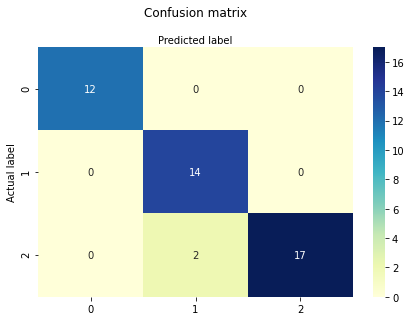

In [82]:
class_names = [0, 1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()